In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
import numpy as np

In [2]:
dpi = 2000

In [3]:
folder_output = '/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Output_files/'

list1_file = folder_output + '14_Transcription_regulatorlist_baitset1_with_scores_with_blacklist.csv'
list2_file = folder_output + '15_Transcription_regulatorlist_baitset2_with_scores_with_blacklist.csv'
list3_file = folder_output + '16_Transcription_regulatorlist_baitset3_with_scores_with_blacklist.csv'
files = [list1_file, list2_file, list3_file]

In [4]:
dfs = [pd.read_csv(file) for file in files]
df_names = ['Baitset {}'.format(n + 1) for n in range(3)]

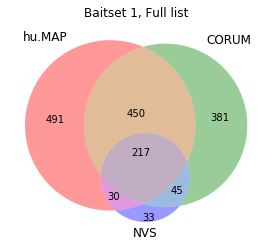

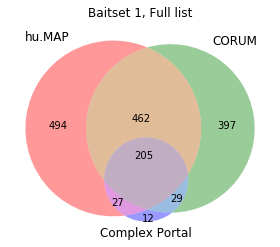

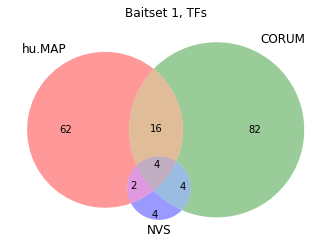

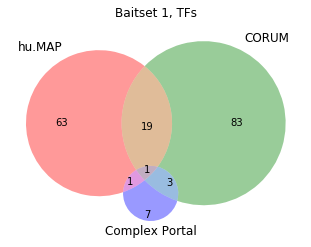

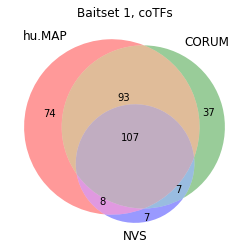

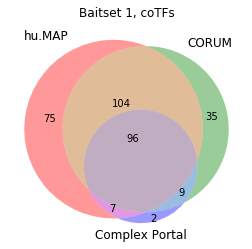

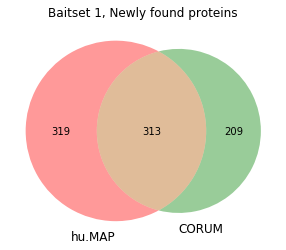

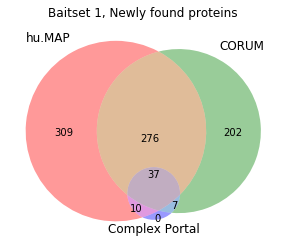

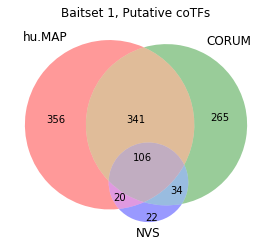

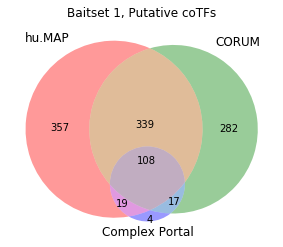

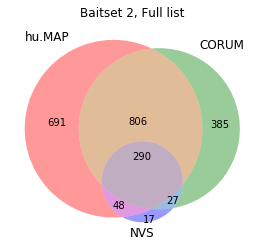

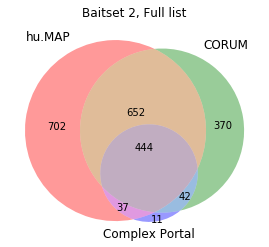

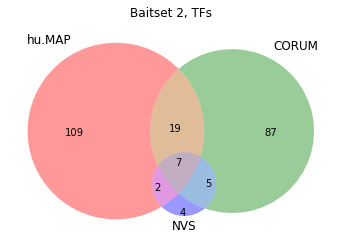

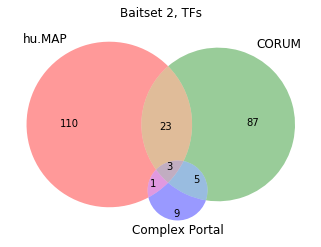

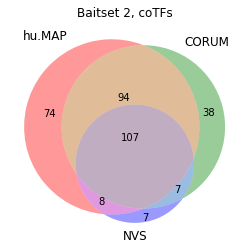

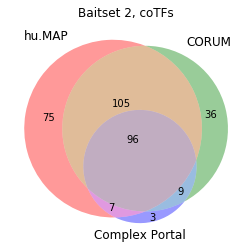

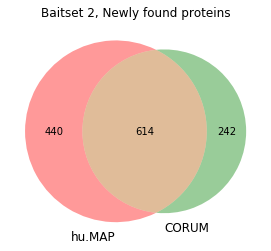

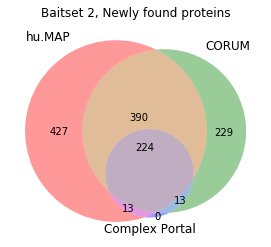

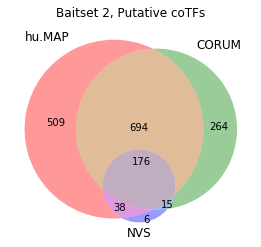

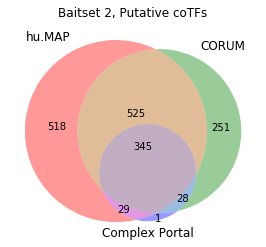

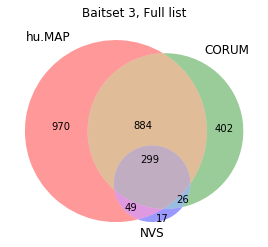

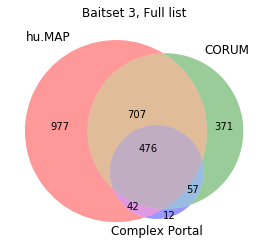

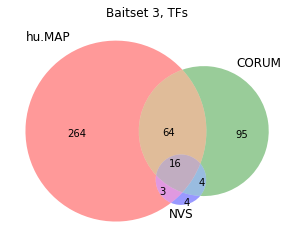

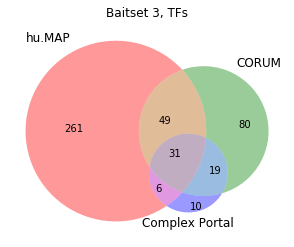

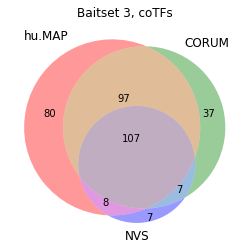

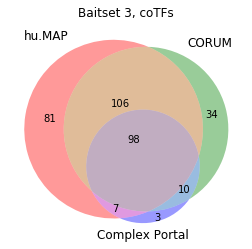

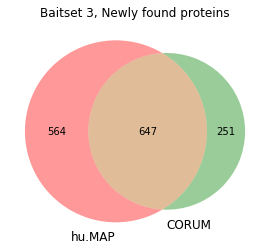

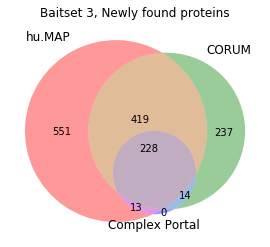

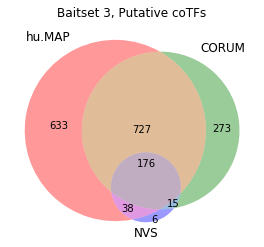

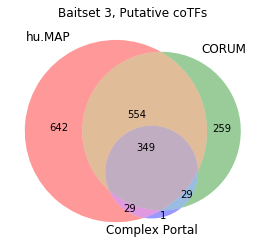

In [5]:
n = 23

for df, title in zip(dfs, df_names):
    for subset in ['Full list', 'TFs', 'coTFs', 'Newly found proteins', 'Putative coTFs']:
        if subset == 'Full list':
            df_subset = df.copy()
        elif subset == 'TFs':
            df_subset = df.loc[df['Is_TF'] == 1].copy()
        elif subset == 'coTFs':
            df_subset = df.loc[df['In_bait_gocofs'] == 1]
        elif subset == 'Newly found proteins':
            df_subset = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)]
        elif subset == 'Putative coTFs':
            df_subset = df.loc[(df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0)]
        
        in_humap = set(df_subset.loc[df_subset['ComplexID_huMAP'].notnull()]['Gene Symbol'])
        in_corum = set(df_subset.loc[df_subset['ComplexID_CORUM'].notnull()]['Gene Symbol'])
        in_nvs = set(df_subset.loc[df_subset['ComplexName_nvs'].notnull()]['Gene Symbol'])
        in_complexportal = set(df_subset.loc[df_subset['ComplexID_ComplexPortal'].notnull()]['Gene Symbol'])
        
        if subset == 'Newly found proteins':
            venn2([in_humap, in_corum], set_labels = ('hu.MAP', 'CORUM'))
        else:
            venn3([in_humap, in_corum, in_nvs], set_labels = ('hu.MAP', 'CORUM', 'NVS'))
        plt.title(title + ', ' + subset)
        
        n +=1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_complexes_NVS_{}_subset_{}_venn_diagram.png'.format(n, title, subset), dpi = dpi)
        plt.show()
        
        venn3([in_humap, in_corum, in_complexportal], set_labels = ('hu.MAP', 'CORUM', 'Complex Portal'))
        plt.title(title + ', ' + subset)
        n += 1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_complexes_ComplexPortal_{}_subset_{}_venn_diagram.png'.format(n, title, subset), dpi = dpi)
        plt.show()

Proteins found in which datasources with each bait protein:


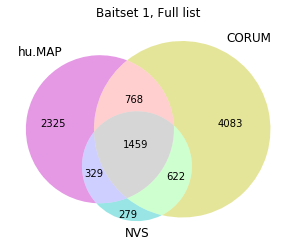

/mbshome/nvelthuijs/.conda/envs/venndiagram/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


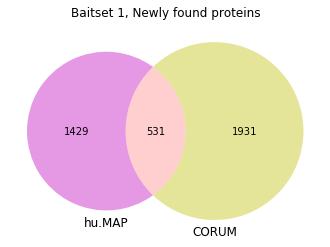

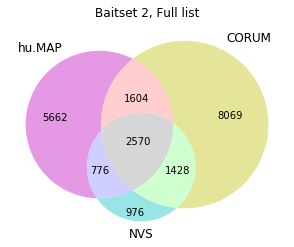

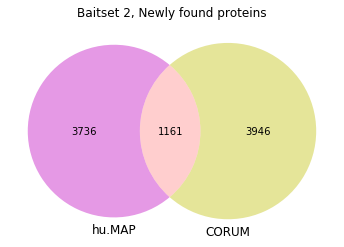

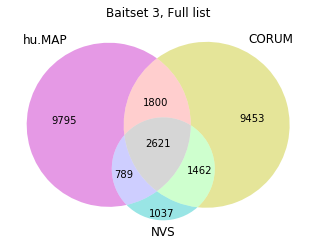

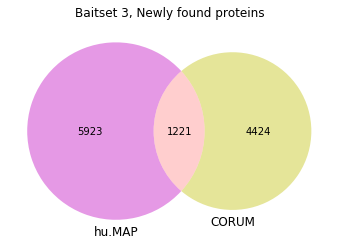

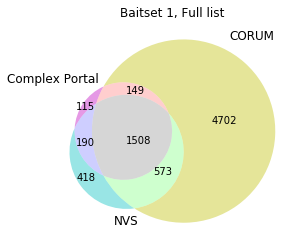

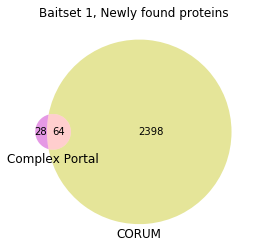

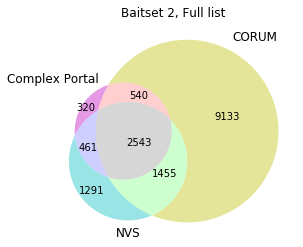

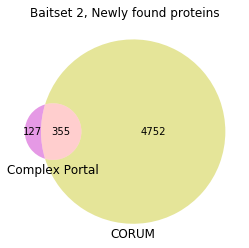

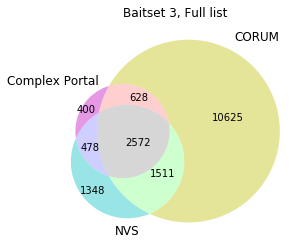

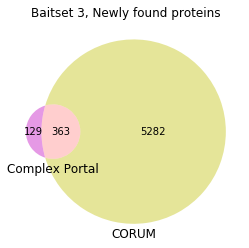

In [6]:
print('Proteins found in which datasources with each bait protein:')

fig_n = 53

for df, title in zip(dfs, ['Baitset 1', 'Baitset 2', 'Baitset 3']):
    
    for sub in ['Full list', 'Newly found proteins']:
        
        if sub == 'Full list':
            subdf = df.copy()
            labels = ['hu.MAP', 'CORUM', 'NVS']
        if sub == 'Newly found proteins':
            subdf = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)].copy()
            labels = ['hu.MAP', 'CORUM', '']

        h = 0
        h_c = 0
        h_c_n = 0
        h_n = 0
        c = 0
        c_n = 0
        n = 0

        for index, row in subdf.iterrows():
            protein = row['Gene Symbol']

            baits = [row['Bait_{}'.format(datasource)].split(';') if isinstance(row['Bait_{}'.format(datasource)], str) else [] for datasource in ['huMAP', 'CORUM', 'nvs']]
            all_baits = set(sum(baits, []))
            humap, corum, nvs = (x for x in baits)

            for bait in all_baits:
                inhumap = bait in humap
                incorum = bait in corum
                innvs = bait in nvs

                if inhumap and incorum and innvs:
                    h_c_n += 1
                elif inhumap and incorum:
                    h_c += 1
                elif inhumap and innvs:
                    h_n += 1
                elif inhumap:
                    h += 1
                elif incorum and innvs:
                    c_n += 1
                elif incorum:
                    c += 1
                else:
                    n += 1
        
        venn3([h, c, h_c, n, h_n, c_n, h_c_n], set_labels = labels, set_colors = ('m', 'y', 'c'))
        plt.title('{}, {}'.format(title, sub))
        
        fig_n += 1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_bait_proteins_hu.MAP_{}_subset_{}_All_interactions_venn_diagram.png'.format(fig_n, title, sub), dpi = dpi)
        plt.show()

        
# Same thing, now replace hu.MAP with Complex Portal
for df, title in zip(dfs, ['Baitset 1', 'Baitset 2', 'Baitset 3']):
    
    for sub in ['Full list', 'Newly found proteins']:
        
        if sub == 'Full list':
            subdf = df.copy()
            labels = ['Complex Portal', 'CORUM', 'NVS']
        if sub == 'Newly found proteins':
            subdf = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)].copy()
            labels = ['Complex Portal', 'CORUM', '']

        h = 0
        h_c = 0
        h_c_n = 0
        h_n = 0
        c = 0
        c_n = 0
        n = 0

        for index, row in subdf.iterrows():
            protein = row['Gene Symbol']

            baits = [row['Bait_{}'.format(datasource)].split(';') if isinstance(row['Bait_{}'.format(datasource)], str) else [] for datasource in ['ComplexPortal', 'CORUM', 'nvs']]
            all_baits = set(sum(baits, []))
            complexportal, corum, nvs = (x for x in baits)

            for bait in all_baits:
                incomplexportal = bait in complexportal
                incorum = bait in corum
                innvs = bait in nvs

                if incomplexportal and incorum and innvs:
                    h_c_n += 1
                elif incomplexportal and incorum:
                    h_c += 1
                elif incomplexportal and innvs:
                    h_n += 1
                elif incomplexportal:
                    h += 1
                elif incorum and innvs:
                    c_n += 1
                elif incorum:
                    c += 1
                else:
                    n += 1
        
        venn3([h, c, h_c, n, h_n, c_n, h_c_n], set_labels = labels, set_colors = ('m', 'y', 'c'))
        plt.title('{}, {}'.format(title, sub))
        
        fig_n += 1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_bait_proteins_ComplexPortal_{}_subset_{}_All_interactions_venn_diagram.png'.format(fig_n, title, sub), dpi = dpi)
        plt.show()

Proteins found in which datasources with each bait protein, proteins found in hu.MAP and CORUM or Complex Ptortal and CORUM only:


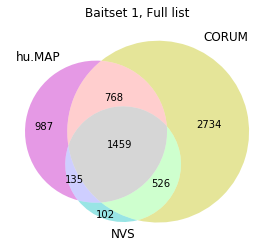

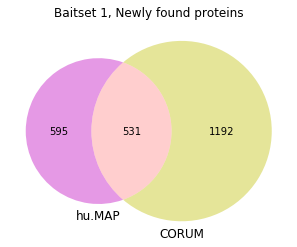

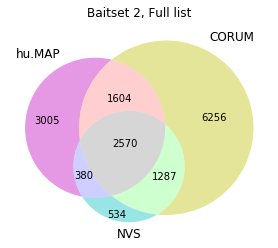

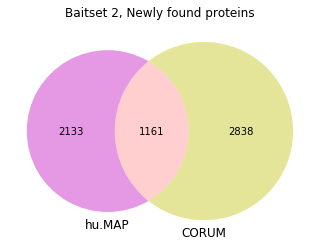

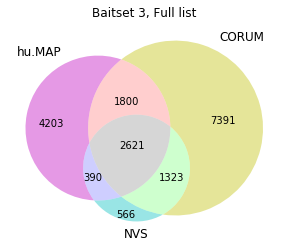

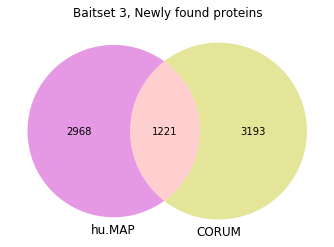

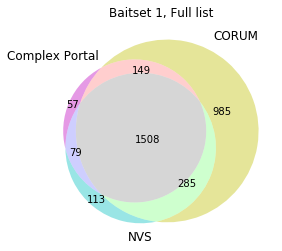

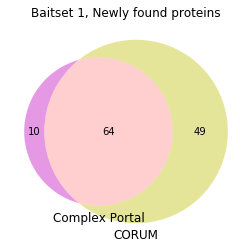

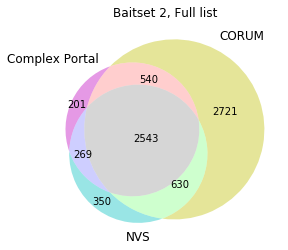

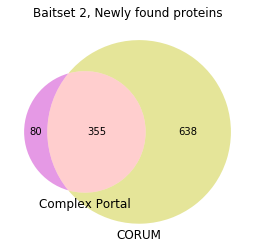

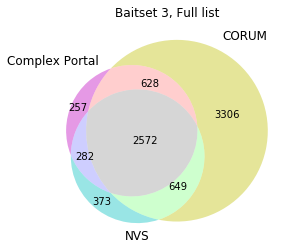

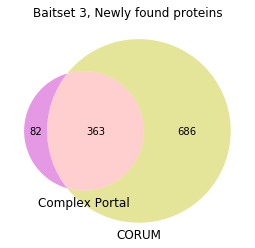

In [7]:
print('Proteins found in which datasources with each bait protein, proteins found in hu.MAP and CORUM or Complex Ptortal and CORUM only:')

fig_n = 65

for df, title in zip(dfs, ['Baitset 1', 'Baitset 2', 'Baitset 3']):
    
    df = df.loc[df['ComplexID_huMAP'].notnull() & df['ComplexID_CORUM'].notnull()]
    
    for sub in ['Full list', 'Newly found proteins']:
        
        if sub == 'Full list':
            subdf = df.copy()
            labels = ['hu.MAP', 'CORUM', 'NVS']
        if sub == 'Newly found proteins':
            subdf = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)].copy()
            labels = ['hu.MAP', 'CORUM', '']

        h = 0
        h_c = 0
        h_c_n = 0
        h_n = 0
        c = 0
        c_n = 0
        n = 0

        for index, row in subdf.iterrows():
            protein = row['Gene Symbol']

            baits = [row['Bait_{}'.format(datasource)].split(';') if isinstance(row['Bait_{}'.format(datasource)], str) else [] for datasource in ['huMAP', 'CORUM', 'nvs']]
            all_baits = set(sum(baits, []))
            humap, corum, nvs = (x for x in baits)

            for bait in all_baits:
                inhumap = bait in humap
                incorum = bait in corum
                innvs = bait in nvs

                if inhumap and incorum and innvs:
                    h_c_n += 1
                elif inhumap and incorum:
                    h_c += 1
                elif inhumap and innvs:
                    h_n += 1
                elif inhumap:
                    h += 1
                elif incorum and innvs:
                    c_n += 1
                elif incorum:
                    c += 1
                else:
                    n += 1
        
        venn3([h, c, h_c, n, h_n, c_n, h_c_n], set_labels = labels, set_colors = ('m', 'y', 'c'))
        plt.title('{}, {}'.format(title, sub))
        
        fig_n += 1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_bait_proteins_hu.MAP_{}_subset_{}_found_in_both_humap_corum_venn_diagram.png'.format(fig_n, title, sub), dpi = dpi)
        plt.show()
        
        
# Same thing, now replace hu.MAP with Complex Portal
for df, title in zip(dfs, ['Baitset 1', 'Baitset 2', 'Baitset 3']):
    
    df = df.loc[df['ComplexID_ComplexPortal'].notnull() & df['ComplexID_CORUM'].notnull()]
    
    for sub in ['Full list', 'Newly found proteins']:
        
        if sub == 'Full list':
            subdf = df.copy()
            labels = ['Complex Portal', 'CORUM', 'NVS']
        if sub == 'Newly found proteins':
            subdf = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)].copy()
            labels = ['Complex Portal', 'CORUM', '']

        h = 0
        h_c = 0
        h_c_n = 0
        h_n = 0
        c = 0
        c_n = 0
        n = 0

        for index, row in subdf.iterrows():
            protein = row['Gene Symbol']

            baits = [row['Bait_{}'.format(datasource)].split(';') if isinstance(row['Bait_{}'.format(datasource)], str) else [] for datasource in ['ComplexPortal', 'CORUM', 'nvs']]
            all_baits = set(sum(baits, []))
            complexportal, corum, nvs = (x for x in baits)

            for bait in all_baits:
                incomplexportal = bait in complexportal
                incorum = bait in corum
                innvs = bait in nvs

                if incomplexportal and incorum and innvs:
                    h_c_n += 1
                elif incomplexportal and incorum:
                    h_c += 1
                elif incomplexportal and innvs:
                    h_n += 1
                elif incomplexportal:
                    h += 1
                elif incorum and innvs:
                    c_n += 1
                elif incorum:
                    c += 1
                else:
                    n += 1
        
        venn3([h, c, h_c, n, h_n, c_n, h_c_n], set_labels = labels, set_colors = ('m', 'y', 'c'))
        plt.title('{}, {}'.format(title, sub))
        
        fig_n += 1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_bait_proteins_ComplexPortal_{}_subset_{}_found_in_both_complexportal_corum_venn_diagram.png'.format(fig_n, title, sub), dpi = dpi)
        plt.show()

Proteins found in which datasources with each bait protein, TF-nonTF only:
1457


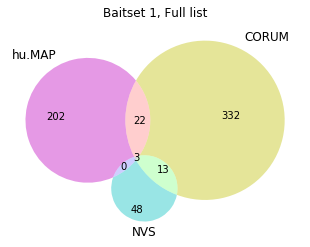

/mbshome/nvelthuijs/.conda/envs/venndiagram/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:47: UserWarning: All circles have zero area
  warnings.warn("All circles have zero area")


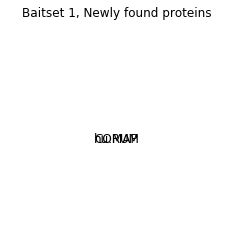

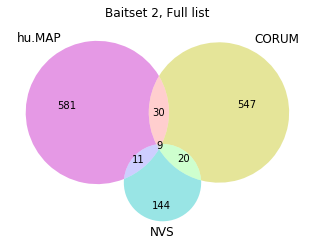

/mbshome/nvelthuijs/.conda/envs/venndiagram/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


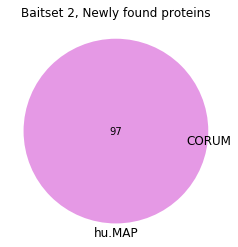

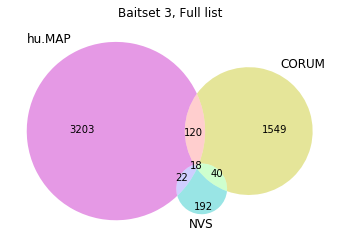

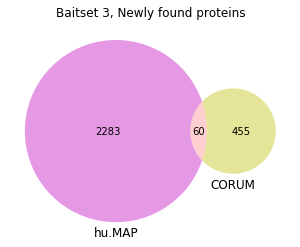

In [8]:
print('Proteins found in which datasources with each bait protein, TF-nonTF only:')

fig_n = 77

tfs = set(dfs[2].loc[dfs[2]['Is_TF'] == 1]['Gene Symbol'])
print(len(tfs))


for df, title in zip(dfs, ['Baitset 1', 'Baitset 2', 'Baitset 3']):
    
    for sub in ['Full list', 'Newly found proteins']:
        
        if sub == 'Full list':
            subdf = df.copy()
            labels = ['hu.MAP', 'CORUM', 'NVS']
        if sub == 'Newly found proteins':
            subdf = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)].copy()
            labels = ['hu.MAP', 'CORUM', '']

        h = 0
        h_c = 0
        h_c_n = 0
        h_n = 0
        c = 0
        c_n = 0
        n = 0

        for index, row in subdf.iterrows():
            protein = row['Gene Symbol']

            baits = [row['Bait_{}'.format(datasource)].split(';') if isinstance(row['Bait_{}'.format(datasource)], str) else [] for datasource in ['huMAP', 'CORUM', 'nvs']]
            all_baits = set(sum(baits, []))
            humap, corum, nvs = (x for x in baits)

            for bait in all_baits:
                if (protein in tfs) ^ (bait in tfs):
                
                    inhumap = bait in humap
                    incorum = bait in corum
                    innvs = bait in nvs

                    if inhumap and incorum and innvs:
                        h_c_n += 1
                    elif inhumap and incorum:
                        h_c += 1
                    elif inhumap and innvs:
                        h_n += 1
                    elif inhumap:
                        h += 1
                    elif incorum and innvs:
                        c_n += 1
                    elif incorum:
                        c += 1
                    else:
                        n += 1
        
        venn3([h, c, h_c, n, h_n, c_n, h_c_n], set_labels = labels, set_colors = ('m', 'y', 'c'))
        plt.title('{}, {}'.format(title, sub))
        
        fig_n += 1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_bait_proteins_{}_subset_{}_TF_nonTF_venn_diagram.png'.format(fig_n, title, sub), dpi = dpi)
        plt.show()

Proteins found in which datasources with each bait protein, TF-nonTF only, found in hu.MAP and CORUM only:


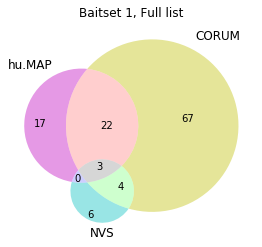

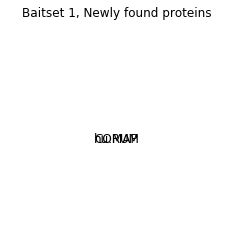

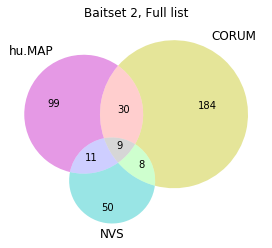

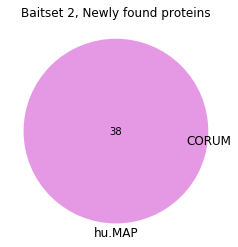

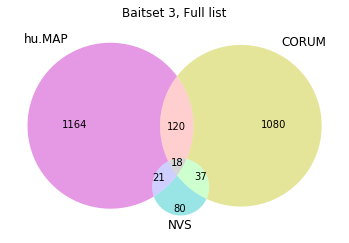

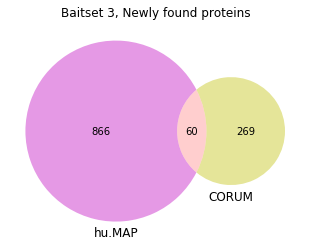

In [9]:
print('Proteins found in which datasources with each bait protein, TF-nonTF only, found in hu.MAP and CORUM only:')

fig_n = 83

tfs = set(dfs[2].loc[dfs[2]['Is_TF'] == 1]['Gene Symbol'])

for df, title in zip(dfs, ['Baitset 1', 'Baitset 2', 'Baitset 3']):
    
    df = df.loc[df['ComplexID_huMAP'].notnull() & df['ComplexID_CORUM'].notnull()]
    
    for sub in ['Full list', 'Newly found proteins']:
        
        if sub == 'Full list':
            subdf = df.copy()
            labels = ['hu.MAP', 'CORUM', 'NVS']
        if sub == 'Newly found proteins':
            subdf = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)].copy()
            labels = ['hu.MAP', 'CORUM', '']

        h = 0
        h_c = 0
        h_c_n = 0
        h_n = 0
        c = 0
        c_n = 0
        n = 0

        for index, row in subdf.iterrows():
            protein = row['Gene Symbol']

            baits = [row['Bait_{}'.format(datasource)].split(';') if isinstance(row['Bait_{}'.format(datasource)], str) else [] for datasource in ['huMAP', 'CORUM', 'nvs']]
            all_baits = set(sum(baits, []))
            humap, corum, nvs = (x for x in baits)

            for bait in all_baits:
                if (protein in tfs) ^ (bait in tfs):
                
                    inhumap = bait in humap
                    incorum = bait in corum
                    innvs = bait in nvs

                    if inhumap and incorum and innvs:
                        h_c_n += 1
                        
#                         if title == 'Baitset 3' and sub == 'Full list':
#                             print(protein, bait, '198')
                        
                    elif inhumap and incorum:
                        h_c += 1
                        
#                         if title == 'Baitset 3' and sub == 'Full list':
#                             print(protein, bait, '410')
                            
#                         elif title == 'Baitset 3' and sub == 'Newfound proteins':
#                             print(protein, bait, '294')
                        
                    elif inhumap and innvs:
                        h_n += 1
                    elif inhumap:
                        h += 1
                    elif incorum and innvs:
                        c_n += 1
                    elif incorum:
                        c += 1
                    else:
                        n += 1
        
        venn3([h, c, h_c, n, h_n, c_n, h_c_n], set_labels = labels, set_colors = ('m', 'y', 'c'))
        plt.title('{}, {}'.format(title, sub))
        
        fig_n += 1
        plt.savefig('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Figures/0{}_Overlap_bait_proteins_{}_subset_{}_TF_nonTF_found_in_both_humap_corum_venn_diagram.png'.format(fig_n, title, sub), dpi = dpi)
        plt.show()

In [10]:
df_lists = []

for df, title in zip(dfs, ['Baitset 1', 'Baitset 2', 'Baitset 3']):
    
    for sub in ['Full list', 'Newly found proteins']:
        
        match_counts = [0 for x in range(10)]
        
        if sub == 'Full list':
            subdf = df.copy()
        if sub == 'Newly found proteins':
            subdf = df.loc[(df['In_bait_crems'] == 0) &
                              (df['In_bait_snfs'] == 0) &
                              (df['In_bait_nursa'] == 0) &
                              (df['In_bait_gocofs'] == 0) &
                              (df['Is_TF'] == 0) &
                              (df['In_NVS'] == 0)].copy()
    
        for index, row in subdf.iterrows():
            protein = row['Gene Symbol']
            matches_found = 0

            baits = [row['Bait_{}'.format(datasource)].split(';') if isinstance(row['Bait_{}'.format(datasource)], str) else [] for datasource in ['huMAP', 'CORUM', 'nvs']]
            all_baits = set(sum(baits, []))
            humap, corum, nvs = (x for x in baits)

            for bait in all_baits:
                inhumap = bait in humap
                incorum = bait in corum
                innvs = bait in nvs

                if inhumap and incorum:
                    matches_found += 1
            
            if matches_found >= 10:
                matches_found = 10
#                 match_counts[9] += 1
            if matches_found != 0:
                match_counts[matches_found - 1] += 1
        
        df_lists.append([sub, title] + match_counts)


results = pd.DataFrame(df_lists, columns = ['Subset',
                                  'Baitset'] + ['{} matches'.format(x + 1) for x in range(10)]).sort_values(by = ['Subset', 'Baitset']).set_index(['Subset', 'Baitset']).rename(columns = {'10 matches':'>10 matches'})
sum_col = results.sum(axis = 1)
results.insert(0, '> 0 matches', sum_col)
    
results.to_csv(folder_output + '13_matching_bait_proteins.csv')

results

> 0 matches  1 matches  2 matches  3 matches  \
Subset               Baitset                                                   
Full list            Baitset 1          574        238        164         34   
                     Baitset 2          878        348         98         87   
                     Baitset 3          948        386        110         75   
Newly found proteins Baitset 1          256        108         95          8   
                     Baitset 2          404        184         43         43   
                     Baitset 3          412        189         44         34   

                                4 matches  5 matches  6 matches  7 matches  \
Subset               Baitset                                                 
Full list            Baitset 1         38         22         12          1   
                     Baitset 2         35         92         37         15   
                     Baitset 3         46         97         31         25   
Newly found proteins Baitset 1         23         16          5          1   
                     Baitset 2         20         66         18          6   
                     Baitset 3         29         66          8         14   

                                8 matches  9 matches  >10 matches  
Subset               Baitset                                       
Full list            Baitset 1          2          7           56  
                     Baitset 2         42         24          100  
                     Baitset 3         37         38          103  
Newly found proteins Baitset 1          0          0            0  
                     Baitset 2         18          3            3  
                     Baitset 3          9         14            5